In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test=y_test.reshape(-1,)

In [9]:
classes= ["airplane","automobile","bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [10]:
def plot_sample(x, y, index):
    plt.figure(figsize=(15, 2))  # Create a figure
    plt.imshow(x[index])         # Show the image
    plt.xlabel(classes[y[index]])  # Label the image
    plt.show()                   # Display the plot


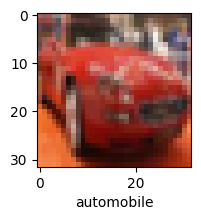

In [11]:
plot_sample(x_train, y_train, 5)

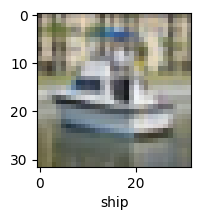

In [12]:
plot_sample(x_train,y_train, 501)

In [13]:
x_train=x_train/255.0
x_test=x_test/255.0

In [14]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation="relu"),
    layers.Dense(1000, activation="relu"),
    layers.Dense(1000,activation="softmax")
])

ann.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

ann.fit(x_train,y_train,epochs =5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2539 - loss: 2.2254
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3932 - loss: 1.7181
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4338 - loss: 1.6074
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4538 - loss: 1.5420
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4732 - loss: 1.4872


In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
x_pred = ann.predict(x_test)
x_pred_classes= [np.argmax(element)for element in x_pred]

print("Classification Report: \n", classification_report(x_pred_classes,y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.60      0.58       922
           1       0.57      0.65      0.60       881
           2       0.25      0.42      0.32       599
           3       0.49      0.30      0.38      1630
           4       0.34      0.47      0.40       723
           5       0.37      0.33      0.35      1119
           6       0.57      0.50      0.53      1138
           7       0.61      0.48      0.54      1269
           8       0.48      0.74      0.58       651
           9       0.58      0.55      0.56      1068

    accuracy                           0.48     10000
   macro avg       0.48      0.50      0.48     10000
weighted avg       0.50      0.48      0.48     10000



In [16]:
import seaborn as sns


In [17]:
#plt.figure(figsize=(14,7))
#sns.heatmap(x_pred, annot= True)
#plt.ylabel("Truth")
#plt.xlabel("Prediction")
#plt.title("Confusion Matrix")
#plt.show()#

In [18]:
cnn=models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
cnn.compile(optimizer="adam", 
            loss="sparse_categorical_crossentropy", 
            metrics=["accuracy"])


In [20]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3951 - loss: 1.6745
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6132 - loss: 1.1140
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6657 - loss: 0.9663
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6977 - loss: 0.8690
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7317 - loss: 0.7782
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7469 - loss: 0.7263
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7693 - loss: 0.6697
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7828 - loss: 0.6213
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8009 - loss: 0.5759
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8135 - loss: 0.5344


In [22]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6981 - loss: 0.9534


[0.971914529800415, 0.6958000063896179]

In [23]:
x_pred= cnn.predict(x_test)
x_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[7.50123145e-05, 3.37943260e-04, 2.46061136e-05, 9.68399644e-01,
        5.24030793e-06, 2.65543442e-02, 1.55964866e-03, 1.87603055e-05,
        3.02280486e-03, 1.92992820e-06],
       [4.89855942e-04, 1.41461879e-01, 1.12275934e-07, 5.07453592e-07,
        1.97665190e-10, 5.51681545e-09, 3.71377462e-09, 1.32615352e-09,
        8.52961600e-01, 5.08593908e-03],
       [9.73066781e-03, 1.80696607e-01, 9.60433172e-05, 1.07790309e-03,
        2.58453438e-05, 1.19140723e-05, 2.26803986e-05, 3.09333300e-05,
        8.05734992e-01, 2.57234299e-03],
       [9.45428908e-01, 6.78267004e-03, 1.95800373e-03, 4.12417372e-04,
        3.91462026e-03, 2.17692195e-05, 2.13638887e-05, 9.32906573e-07,
        4.14466895e-02, 1.27416761e-05],
       [2.41997459e-05, 9.52016926e-05, 9.39472020e-03, 1.91101074e-01,
        4.79654312e-01, 1.51373772e-02, 3.03717881e-01, 4.07670123e-05,
        8.33410828e-04, 1.03910679e-06]], dtype=float32)

In [24]:
x_class=[np.argmax(element) for element in x_pred]
x_class[:5]

[3, 8, 8, 0, 4]

In [25]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

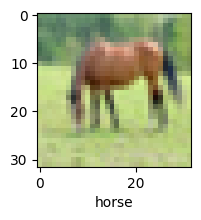

In [27]:
plot_sample(x_test,y_test,60)

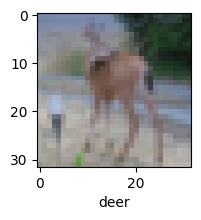

In [28]:
plot_sample(x_test,y_test,100)

In [29]:
classes[x_class[60]]

'horse'